In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from os.path import join

In [12]:
data_dst = '../../data/calibration/'
plot_dst = '../../plots/empirical_observations/'

In [2]:
symptom_data = pd.read_csv(join(data_dst,'empirical_symptomatic_case_ratios.csv'))

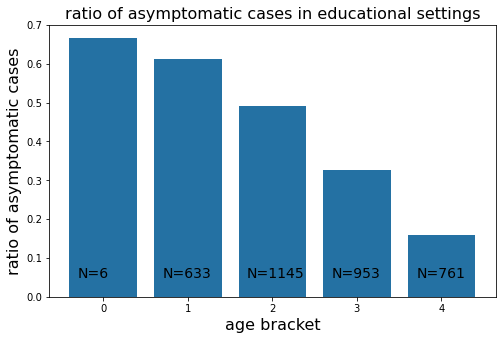

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(symptom_data.index, symptom_data['ratio_asymptomatic'], color='#2471A3')
ax.set_ylabel('ratio of asymptomatic cases', fontsize=16)
ax.set_xlabel('age bracket', fontsize=16)
ax.set_title('ratio of asymptomatic cases in educational settings', fontsize=16)
for i, N in enumerate(symptom_data['count']):
    ax.text(i-0.3, 0.05, 'N={}'.format(N), fontsize=14)
    
plt.savefig(join(plot_dst, 'ratio_of_asymptomatic_cases.svg'), transparent=True)

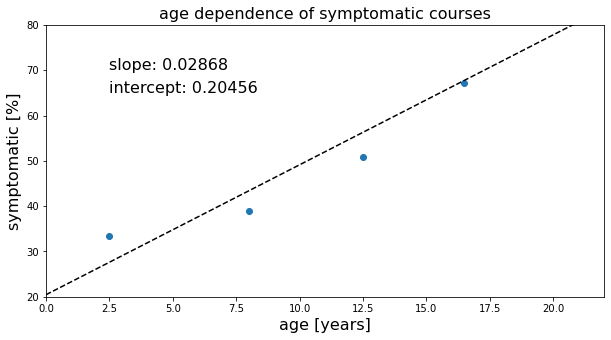

In [18]:
ages = np.asarray([2.5, 8, 12.5, 16.5, 20.5])
ratios = symptom_data['ratio_symptomatic']
slope, intercept, rvalue, pvalue, stderr = stats.linregress(ages, ratios)
x = np.arange(0, 22.5)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, (slope * x + intercept) * 100, 'k--')
ax.scatter(ages, ratios * 100)
ax.text(2.5, 65, 'intercept: {:1.5f}'.format(intercept), fontsize=16)
ax.text(2.5, 70, 'slope: {:1.5f}'.format(slope), fontsize=16)
ax.set_xlabel('age [years]', fontsize=16)
ax.set_ylabel('symptomatic [%]', fontsize=16)
ax.set_title('age dependence of symptomatic courses', fontsize=16)
ax.set_ylim(20, 80)
ax.set_xlim(0, 22)
plt.savefig(join(plot_dst, 'age_symptom_discount.svg'), transparent=True)

In [19]:
print('slooe: {:1.4f}, intercept: {:1.4f}'.format(slope, intercept))

slooe: 0.0287, intercept: 0.2046
